# Automatic Measuring Environment

In [9]:
import matplotlib.pyplot as plt
from typing import List, Tuple, Dict
from random import Random
from pathlib import Path

from schnapsen.bots import RandBot, RdeepBot, MLPlayingBot
from schnapsen.game import Bot, SchnapsenGamePlayEngine

In [10]:
def play_tournament(bots: List[Bot], num_games: int = 100) -> Dict[Bot, int]:
    """
    Plays a tournament between the given bots
    :param bots: The bots to play against each other 
    :param num_games: The number of games to play
    :return: A dictionary mapping each bot to the number of wins
    """
    engine = SchnapsenGamePlayEngine()
    wins: Dict[Bot, int] = {}
    for bot1 in bots:
        for bot2 in bots:
            if bot1 == bot2:
                continue
            for n in range(num_games):
                if n % 2 == 0:
                    bot1, bot2 = bot2, bot1
                winner_id, _, _ = engine.play_game(bot1, bot2, Random(n+1))
                if winner_id == bot1:
                    wins[bot1] = wins.get(bot1, 0) + 1
                else:
                    wins[bot2] = wins.get(bot2, 0) + 1
    return wins


def plot_tournament_results(wins: Dict[Bot, int]) -> None:
    """
    Plots the results of a tournament
    :param wins: A dictionary mapping each bot to the number of wins
    """
    bot_names = [str(bot) for bot in wins.keys()]
    bot_wins = [wins[bot] for bot in wins.keys()]
    x = range(len(bot_names))
    plt.bar(x, bot_wins)
    plt.xticks(x, bot_names)
    plt.show()


Testing variations of the RdeepBot:

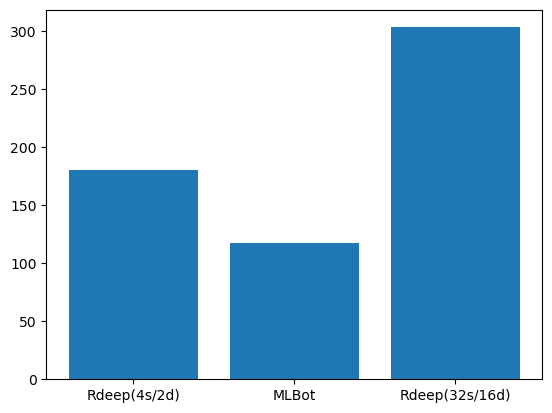

In [12]:
bots: List[Bot] = [
    MLPlayingBot(model_location=Path("../models/nnmodelv5")),
    RdeepBot(num_samples=4, depth=2, rand=Random(3547547535)),
    RdeepBot(num_samples=32, depth=16, rand=Random(3547547535)),
]

results = play_tournament(bots, num_games=100)

plot_tournament_results(results)